In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#import cufflinks as cf
#import plotly.offline as plyo
import datetime as dt
import os

%matplotlib inline
#plyo.init_notebook_mode(connected = True)

plt.style.use('seaborn')

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Borrowed this function from Hilpisch but not really using it here
def create_plot(x, y, styles, labels, axlabels):
    plt.figure(figsize=(10, 6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
        plt.legend(loc=0)

# Need to incorporate a date2num here
def hash_func(x, m , b):
    return np.exp(m*x + b)

In [53]:
fname = os.getcwd() + '/data/hash-rate'
df_hash = pd.read_csv(fname, index_col = 0, parse_dates = True)

fname = os.getcwd() + '/data/market-price'
df_price = pd.read_csv(fname, index_col = 0, parse_dates = True)

# Nothing interesting really happens before 2016
# These time periods must be the same otherwise it will break the scatter plot
df_hash = df_hash[df_hash.index > '2016-01-01']
df_hash['log'] = np.log(df_hash['hash-rate'])
df_price = df_price[df_price.index > '2016-01-01']

# Hash Rate

In [32]:
df_hash['num'] = mdates.date2num(df_hash.index)


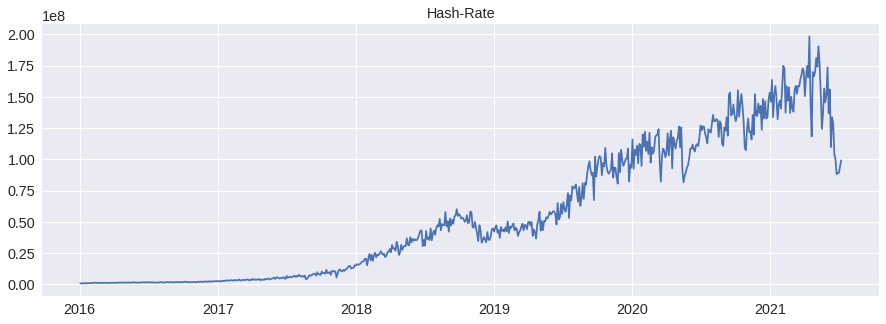

In [33]:
fig = plt.figure()
plt.plot(df_hash['hash-rate']);
plt.title('Hash-Rate');
#plt.yscale('log')


Appears to me that the increase in network hashrate on a log scale can be broken up into two trends.

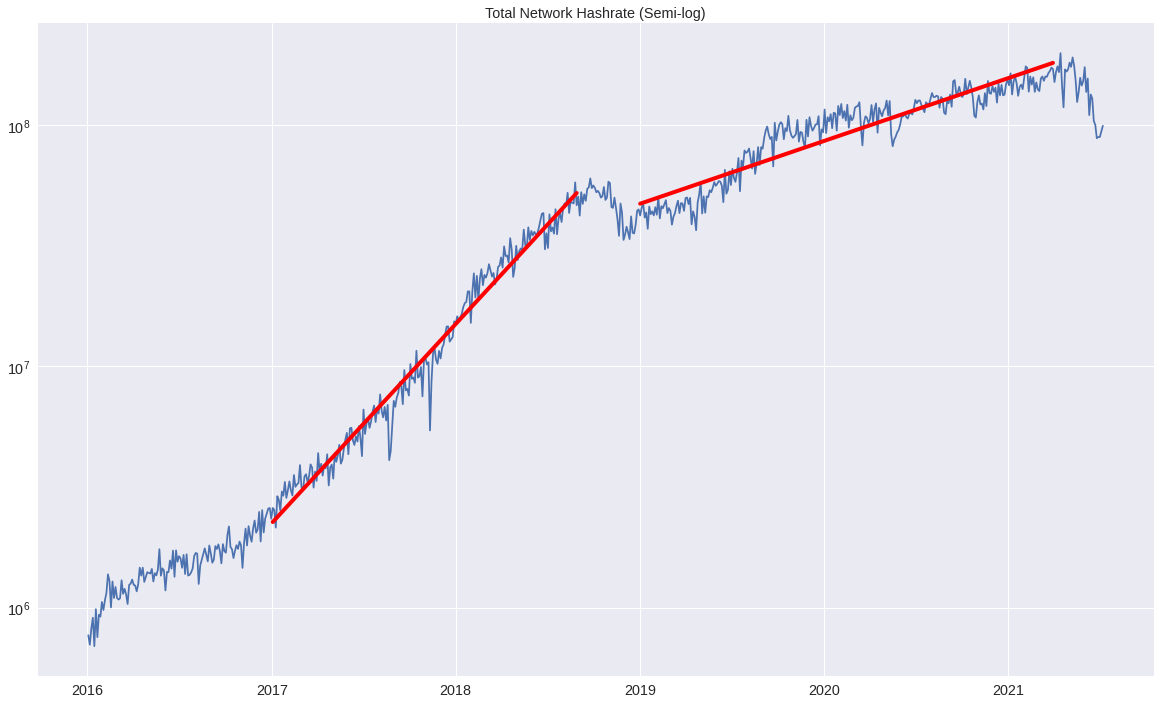

In [34]:
#Fit the first line
reg1 = np.polyfit(df_hash['num'][(df_hash.index > '2017') & (df_hash.index < '2018-9-1')], df_hash['log'][(df_hash.index > '2017')& (df_hash.index < '2018-9-1')], deg=1)
ry1 = np.polyval(reg1, df_hash['num'][(df_hash.index > '2017') & (df_hash.index < '2018-9-1')])

#Fit the second line
reg2 = np.polyfit(df_hash['num'][(df_hash.index > '2019') & (df_hash.index < '2021-4-1')], df_hash['log'][(df_hash.index > '2019')& (df_hash.index < '2021-4-1')], deg=1)
ry2 = np.polyval(reg2, df_hash['num'][(df_hash.index > '2019') & (df_hash.index < '2021-4-1')])

#Plot it
fig = plt.figure(figsize = (20,12))
plt.plot(df_hash.index, df_hash['hash-rate']);
plt.plot(df_hash.index[(df_hash.index > '2017') & (df_hash.index < '2018-9-1')], np.exp(ry1), color = 'r', linewidth = 4);
plt.plot(df_hash.index[(df_hash.index > '2019') & (df_hash.index < '2021-4-1')], np.exp(ry2), color = 'r', linewidth = 4);
plt.title('Total Network Hashrate (Semi-log)');
fig.savefig('networkhashrate.png')
plt.yscale('log')


# Hashrate vs Price

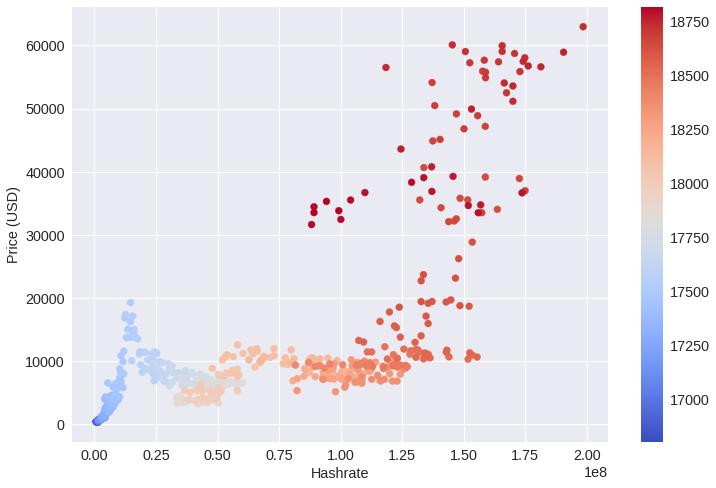

In [35]:
# Color map is from the start of 2016 (Blue) to now (Red)
fig = plt.figure(figsize=(12,8))

c = np.linspace(0, df_hash.shape[0], num = df_hash.shape[0])
plt.scatter(df_hash['hash-rate'], df_price, c=df_hash['num'], cmap = 'coolwarm', marker = 'o');
plt.colorbar()
plt.xlabel('Hashrate');
plt.ylabel('Price (USD)');


In [36]:
# My idea here was to use a total hashrate function as an input to NPV calculation
# This needs some work
hash_func(525, reg1[0], reg1[1])

5.451936537495986e-32

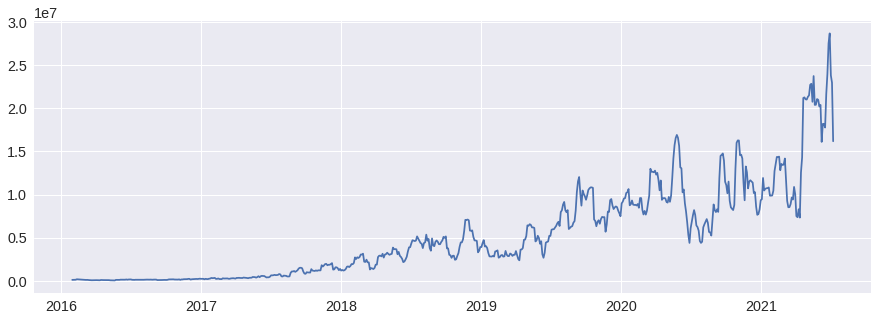

In [37]:
# Attempt to plot the rolling standard deviation.  But I'm not clear on the argument that rolling takes.  I think that's 10 index values so about 30 days
fig = plt.figure()
plt.plot(df_hash['hash-rate'].rolling(10).std())
fig.savefig('volatility.png')

# Market Price

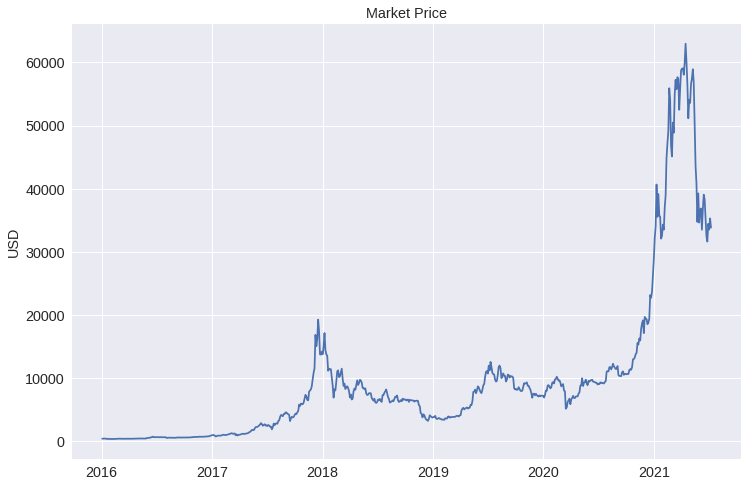

In [39]:
fig = plt.figure(figsize=(12,8))
plt.plot(df_price['market-price']);
plt.title('Market Price');
plt.ylabel('USD');



In [40]:
df_price.index.max() - df_price.index.min()

Timedelta('2013 days 01:00:00')

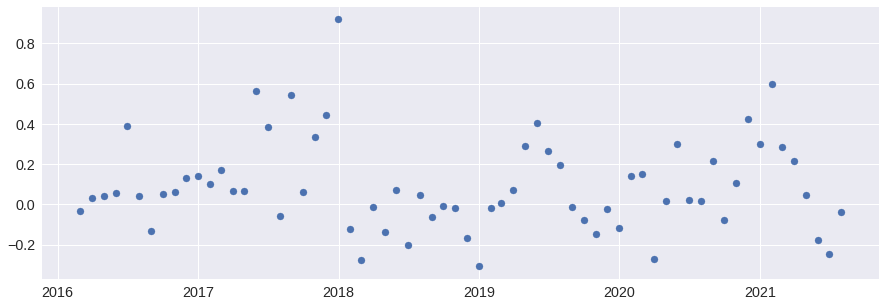

In [41]:
plt.scatter(df_price.resample('M').mean().index, df_price.resample('M').mean().pct_change());

In [42]:
df_price.resample('M').mean().pct_change().mean()

market-price    0.091372
dtype: float64